# Punkttetthet

In [1]:
import numpy
import pandas as pd
import geopandas as gpd
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt

## Laste inn data

In [2]:
tweets = gpd.read_file('data/oslo_subset.gpkg')
# Convert to Pseudo Mercator
tweets = tweets.to_crs(epsg=3857)
tweets["x"] = tweets.geometry.x
tweets["y"] = tweets.geometry.y

In [3]:
display(tweets.head())
print(f'Antall rader: {len(tweets)}')
print(f'Koordinatsystem: {tweets.crs}')

,id,lat,lon,id_str,row_id,user_id,geometry,x,y
0,982346962690367488,59.93626,10.82732,1200483,None,None,POINT (1205291.749 8385560.533),1.205292e+06,8.385561e+06
1,1026597066485772288,59.9106,10.7465,1200577,None,None,POINT (1196294.908 8379860.804),1.196295e+06,8.379861e+06
2,1026596950710337536,59.9106,10.7465,1200578,None,None,POINT (1196294.908 8379860.804),1.196295e+06,8.379861e+06
3,1026596861803683840,59.9106,10.7465,1200579,None,None,POINT (1196294.908 8379860.804),1.196295e+06,8.379861e+06
4,1026596746133221376,59.9106,10.7465,1200580,None,None,POINT (1196294.908 8379860.804),1.196295e+06,8.379861e+06


Antall rader: 29919
Koordinatsystem: epsg:3857


## Plot

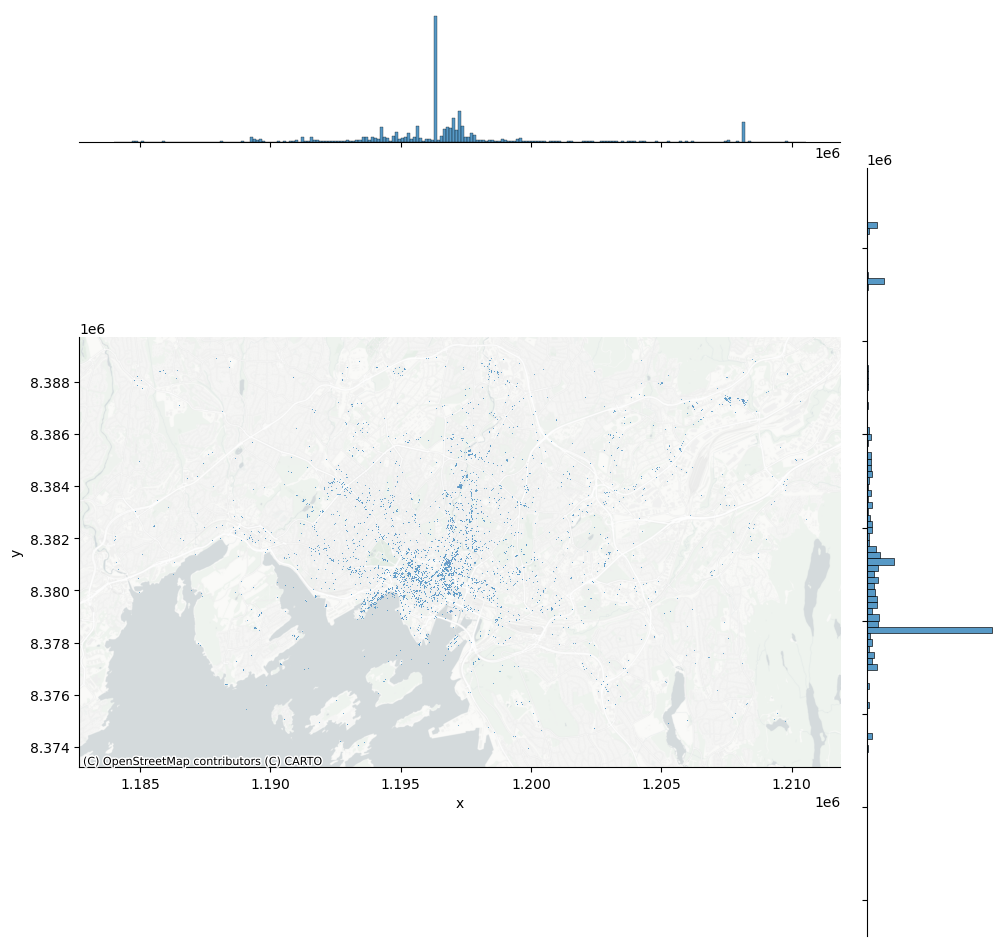

In [4]:
joint_axes = seaborn.jointplot(x="x", y="y", data=tweets, s=0.5, height=10)
contextily.add_basemap(
    joint_axes.ax_joint,
    source=contextily.providers.CartoDB.PositronNoLabels,
)

## Gruppere

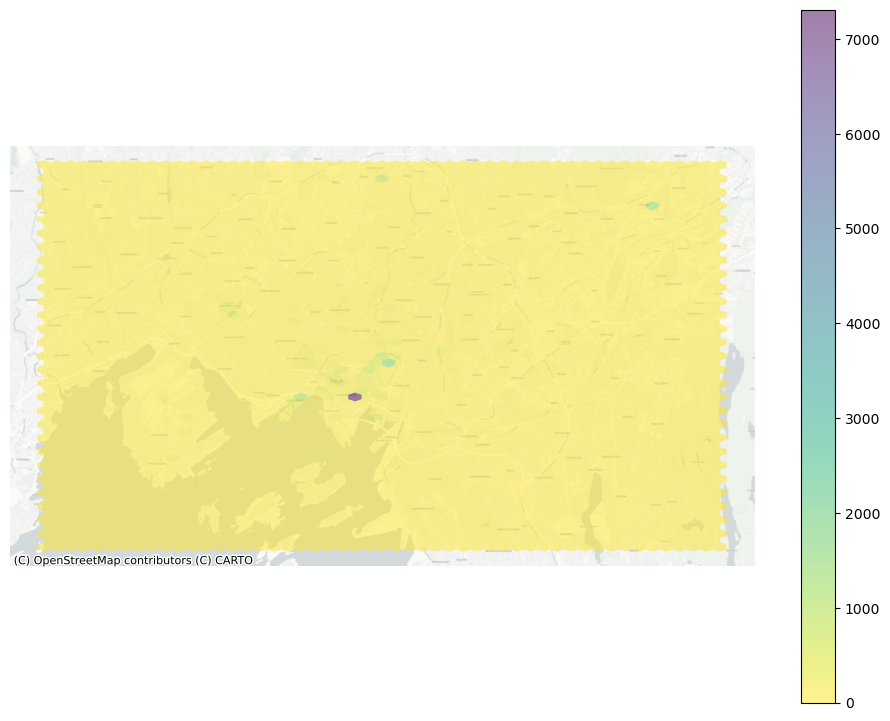

In [5]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    tweets['x'],
    tweets['y'],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

## Kernel Density Estimation

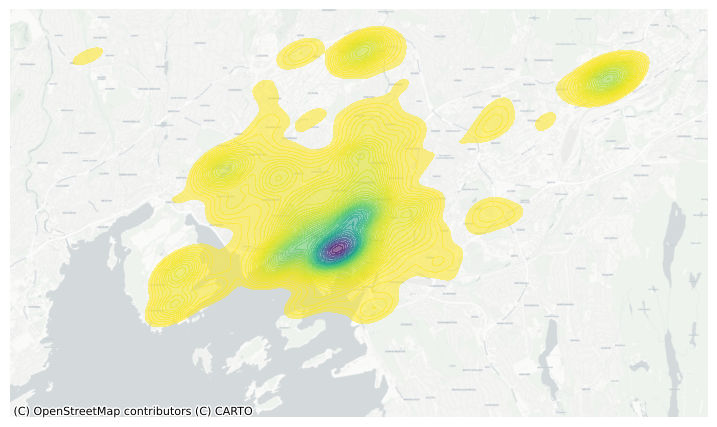

In [6]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x=tweets['x'],
    y=tweets['y'],
    n_levels=50,
    alpha=0.55,
    cmap="viridis_r",
    fill=True,
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()